In [1]:
 #KNN Classification
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/KNN/main/Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data[data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [5]:
data.corr()
# Columns don't seems to be following Linear Co-rrelation 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [6]:
X = data.iloc[:, 1:17]
Y = data.iloc[:, -1] # -1 means last column

In [7]:
model = KNeighborsClassifier(n_neighbors = 10)

In [8]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

In [9]:
# Using Kfold for average accuracy
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv = kfold)

In [10]:
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.8, 0.8, 0.5, 0.6, 0.8])

In [11]:
results.mean()

0.78

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [13]:
model = KNeighborsClassifier(n_neighbors = 8)

In [14]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [15]:
# Using Kfold for average accuracy
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv = kfold)

In [16]:
results

array([0.71428571, 0.85714286, 0.71428571, 1.        , 0.71428571,
       1.        , 0.85714286, 0.71428571, 0.71428571, 0.85714286])

In [17]:
results.mean()

0.8142857142857143

In [18]:
n_neighbors = list(range(1,41))
parameters = {'n_neighbors' : n_neighbors}

In [19]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [20]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [21]:
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

import warnings
warnings.filterwarnings("ignore")

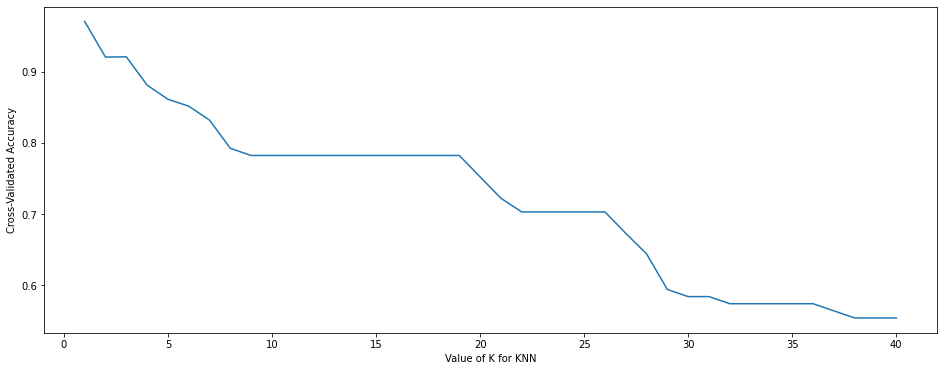

In [22]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [23]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,41),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.970385
1,2,0.920385
2,3,0.920769
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
8,9,0.782308
9,10,0.782308


In [24]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,0.970385
2,3,0.920769
1,2,0.920385
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
14,15,0.782308
18,19,0.782308


In [25]:
#After use of GridSearchCV we can use the top 4 values(1,2,3,4) for our model as it gives us better accuracy

In [26]:
model = KNeighborsClassifier(n_neighbors = 1)

In [27]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=1)

In [28]:
model.predict([[0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0]])

array([4])